In [1]:
df2 = pd.read_excel('F1B_AfterEDA.xlsx')

In [2]:
df2.dtypes

CASE_STATUS               int64
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR            int64
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration            int64
Emp_Stay_Duration_Yr      int64
EMPLOYER_FREQUENCY        int64
AGENT_ATTORNEY            int64
OCCUPATION               object
PWGrWGFm                 object
dtype: object

In [3]:
df2['CASE_STATUS'] = df2['CASE_STATUS'].astype('object')
df2['PW_SOURCE_YEAR'] = df2['PW_SOURCE_YEAR'].astype('object')
df2['CS_DD_Duration'] = df2['CS_DD_Duration'].astype('object')
df2['Emp_Stay_Duration_Yr'] = df2['Emp_Stay_Duration_Yr'].astype('object')
df2['AGENT_ATTORNEY'] = df2['AGENT_ATTORNEY'].astype('object')

In [4]:
from sklearn.preprocessing import normalize
from scipy import stats

In [5]:
df1 = df2.copy()

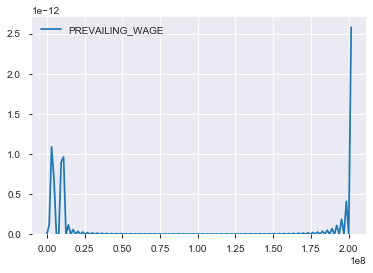

In [6]:
sns.kdeplot(df1['PREVAILING_WAGE'])

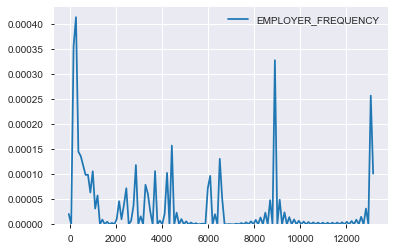

In [7]:
sns.kdeplot(df1['EMPLOYER_FREQUENCY'])

In [8]:
from scipy import stats

(array([2.68120e+04, 3.59557e+05, 1.70000e+01, 3.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  2.56363607,  49.57175327,  96.57987046, 143.58798766,
        190.59610486, 237.60422205, 284.61233925, 331.62045645,
        378.62857365, 425.63669084, 472.64480804]),
 <a list of 10 Patch objects>)

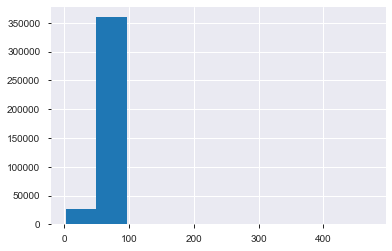

In [9]:
a = df1['PREVAILING_WAGE'].values
tags_ratio = stats.boxcox(a, 0.25)
plt.hist(tags_ratio)

(array([119786.,  98118.,  58576.,  24336.,  19621.,   2100.,  20701.,
          8583.,  21467.,  13103.]),
 array([ 0.        ,  3.87959505,  7.7591901 , 11.63878515, 15.5183802 ,
        19.39797525, 23.2775703 , 27.15716535, 31.0367604 , 34.91635546,
        38.79595051]),
 <a list of 10 Patch objects>)

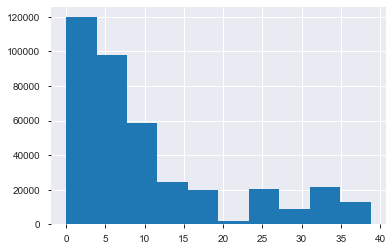

In [10]:
a = df1['EMPLOYER_FREQUENCY'].values
tags_ratio1 = stats.boxcox(a, 0.25)
plt.hist(tags_ratio1)

In [11]:
df1['PREVAILING_WAGE'] = tags_ratio
df1['EMPLOYER_FREQUENCY'] = tags_ratio1

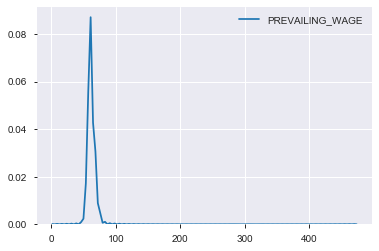

In [12]:
sns.kdeplot(df1['PREVAILING_WAGE'])

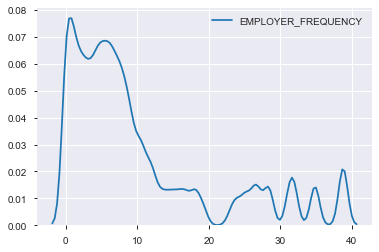

In [13]:
sns.kdeplot(df1['EMPLOYER_FREQUENCY'])

In [14]:
df1.dtypes

CASE_STATUS              object
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR           object
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration           object
Emp_Stay_Duration_Yr     object
EMPLOYER_FREQUENCY      float64
AGENT_ATTORNEY           object
OCCUPATION               object
PWGrWGFm                 object
dtype: object

# CREATING MODEL

In [15]:
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef,cohen_kappa_score,roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [16]:
df1['CASE_STATUS'] = df1.CASE_STATUS.astype('int')

In [17]:
X = df1.drop(['CASE_STATUS','TOTAL_WORKERS'],axis=1)
y = df1.CASE_STATUS

In [18]:
X_dummy = pd.get_dummies(X)

In [19]:
X_dummy.head()

PREVAILING_WAGE  EMPLOYER_FREQUENCY  FULL_TIME_POSITION_N  \
0        69.487232            5.995998                     0   
1        54.215593            0.756828                     0   
2        60.463209            3.595316                     0   
3        72.457150            3.444839                     0   
4        70.100077            1.981395                     0   

   FULL_TIME_POSITION_Y  PW_UNIT_OF_PAY_Hour  PW_UNIT_OF_PAY_Year  \
0                     1                    0                    1   
1                     1                    0                    1   
2                     1                    0                    1   
3                     1                    0                    1   
4                     1                    0                    1   

   PW_SOURCE_YEAR_1998  PW_SOURCE_YEAR_2000  PW_SOURCE_YEAR_2001  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   PW_SOURCE_YEAR_2007  ...  OCCUPATION_Computer Occupations  \
0                    0  ...                                1   
1                    0  ...                                0   
2                    0  ...                                0   
3                    0  ...                                1   
4                    0  ...                                1   

   OCCUPATION_Education Occupations  OCCUPATION_Financial Occupation  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   OCCUPATION_Management Occupation  OCCUPATION_Marketing Occupation  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   OCCUPATION_Mathematical Occupations  OCCUPATION_Medical Occupations  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   

   OCCUPATION_Others  PWGrWGFm_N  PWGrWGFm_Y  
0                  0           0           1  
1                  1           0           1  
2                  1           0           1  
3                  0           1           0  
4                  0           0           1  

[5 rows x 54 columns]

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_dummy,y,test_size=0.3,random_state=3,stratify=y)

### Scaling 

In [21]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [22]:
xtrain_scaled = pd.DataFrame(ms.fit_transform(xtrain),columns = xtrain.columns)

In [23]:
xtest_scaled = pd.DataFrame(ms.transform(xtest),columns = xtest.columns)

In [24]:
xtrain_scaled.head()

PREVAILING_WAGE  EMPLOYER_FREQUENCY  FULL_TIME_POSITION_N  \
0         0.265536            0.092672                   0.0   
1         0.270040            0.464420                   0.0   
2         0.265867            0.281190                   0.0   
3         0.235961            0.152884                   0.0   
4         0.257928            0.092672                   0.0   

   FULL_TIME_POSITION_Y  PW_UNIT_OF_PAY_Hour  PW_UNIT_OF_PAY_Year  \
0                   1.0                  0.0                  1.0   
1                   1.0                  0.0                  1.0   
2                   1.0                  0.0                  1.0   
3                   1.0                  0.0                  1.0   
4                   1.0                  0.0                  1.0   

   PW_SOURCE_YEAR_1998  PW_SOURCE_YEAR_2000  PW_SOURCE_YEAR_2001  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   PW_SOURCE_YEAR_2007  ...  OCCUPATION_Computer Occupations  \
0                  0.0  ...                              1.0   
1                  0.0  ...                              1.0   
2                  0.0  ...                              1.0   
3                  0.0  ...                              1.0   
4                  0.0  ...                              1.0   

   OCCUPATION_Education Occupations  OCCUPATION_Financial Occupation  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               0.0                              0.0   

   OCCUPATION_Management Occupation  OCCUPATION_Marketing Occupation  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               0.0                              0.0   

   OCCUPATION_Mathematical Occupations  OCCUPATION_Medical Occupations  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   

   OCCUPATION_Others  PWGrWGFm_N  PWGrWGFm_Y  
0                0.0         0.0         1.0  
1                0.0         0.0         1.0  
2                0.0         0.0         1.0  
3                0.0         0.0         1.0  
4                0.0         0.0         1.0  

[5 rows x 54 columns]

In [25]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
import warnings
warnings.filterwarnings("ignore")

# Undersampling

In [28]:
from imblearn.under_sampling import RandomUnderSampler
us = RandomUnderSampler()

xtrain_under, ytrain_under = us.fit_resample(xtrain_scaled, ytrain)
xtest_under, ytest_under = us.fit_resample(xtest_scaled, ytest)

print("The count of 1's is",sum(ytrain_under==1))
print("The count of 0's is",sum(ytrain_under==0))
print("The count of 1's is",sum(ytest_under==1))
print("The count of 0's is",sum(ytest_under==0))

The count of 1's is 3553
The count of 0's is 3553
The count of 1's is 1523
The count of 0's is 1523


In [1]:
3553+3553

7106

In [2]:
1523+1523

3046

### Logistic Regression

##### Without threshold

In [30]:
y_pred_lr  = lg.fit(xtrain_under,ytrain_under).predict(xtest_under)
test_lr = round(accuracy_score(ytest_under,y_pred_lr), 4)
train_lr = round(lg.score(xtrain_under,ytrain_under), 4)

precision,recall,fscore,support=score(ytest_under,y_pred_lr,average='macro')

pre_lr = round(precision, 4)
re_lr = round(recall, 4)
f1_lr = round(fscore, 4)


probs = lg.predict_proba(xtest_under)
probability = probs[:,1]
auc_lr = roc_auc_score(ytest_under,probability)

cv_lr = np.mean(cross_val_score(lg,xtrain_under,ytrain_under,cv=5))

print ('Train Accuracy:',train_lr )
print ('Test Accuracy:',test_lr )
print('Validation Score:',cv_lr)
print('Classification Report\n',classification_report(ytest_under,y_pred_lr))
print('Confusion Matrix\n',confusion_matrix(ytest_under,y_pred_lr))

Train Accuracy: 0.8556
Test Accuracy: 0.8454
Validation Score: 0.8535034963649689
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      1523
           1       0.80      0.91      0.86      1523

    accuracy                           0.85      3046
   macro avg       0.85      0.85      0.84      3046
weighted avg       0.85      0.85      0.84      3046

Confusion Matrix
 [[1184  339]
 [ 132 1391]]


##### With threshold

In [32]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

In [33]:
mlr = lg.fit(xtrain_under,ytrain_under)
y_score_lgt = mlr.predict_proba(xtest_under)[:, 1]
y_pred_lrt = adjusted_classes(y_score_lgt, 0.9)

test_lrt = round(accuracy_score(ytest_under,y_pred_lr), 4)
train_lrt = round(lg.score(xtrain_under,ytrain_under), 4)

precision,recall,fscore,support=score(ytest_under,y_pred_lrt,average='macro')

pre_lrt = round(precision, 4)
re_lrt = round(recall, 4)
f1_lrt = round(fscore, 4)

probs = lg.predict_proba(xtest_under)
probability = probs[:,1]
auc_lrt = roc_auc_score(ytest_under,probability)

cv_lrt = np.mean(cross_val_score(lg,xtrain_under,ytrain_under,cv=5))

print ('Train Accuracy with threshold:',train_lrt )
print ('Test Accuracy  with threshold:',test_lrt )
print('Validation Score:',cv_lrt)
print('Classification Report  with threshold\n',classification_report(ytest_under,y_pred_lrt))
print('Confusion Matrix  with threshold\n',confusion_matrix(ytest_under,y_pred_lrt))

Train Accuracy with threshold: 0.8556
Test Accuracy  with threshold: 0.8454
Validation Score: 0.8535034963649689
Classification Report  with threshold
               precision    recall  f1-score   support

           0       0.58      0.98      0.73      1523
           1       0.94      0.30      0.46      1523

    accuracy                           0.64      3046
   macro avg       0.76      0.64      0.59      3046
weighted avg       0.76      0.64      0.59      3046

Confusion Matrix  with threshold
 [[1491   32]
 [1062  461]]


### Decision Tree

In [35]:
y_pred_dtree  = dtree.fit(xtrain_under,ytrain_under).predict(xtest_under)
test_dtree = round(accuracy_score(ytest_under,y_pred_dtree), 4)
train_dtree = round(dtree.score(xtrain_under,ytrain_under), 4)

precision,recall,fscore,support=score(ytest_under,y_pred_dtree,average='macro')

pre_dtree = round(precision, 4)
re_dtree = round(recall, 4)
f1_dtree = round(fscore, 4)


probs = dtree.predict_proba(xtest_under)
probability = probs[:,1]
auc_dtree = roc_auc_score(ytest_under,probability)

cv_dtree = np.mean(cross_val_score(dtree,xtrain_under,ytrain_under,cv=5))

print ('Train Accuracy:',train_dtree )
print ('Test Accuracy:',test_dtree )
print('Validation Score:',cv_dtree)
print('Classification Report\n',classification_report(ytest_under,y_pred_dtree))
print('Confusion Matrix\n',confusion_matrix(ytest_under,y_pred_dtree))

Train Accuracy: 0.9969
Test Accuracy: 0.8145
Validation Score: 0.8096036132406252
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1523
           1       0.82      0.81      0.81      1523

    accuracy                           0.81      3046
   macro avg       0.81      0.81      0.81      3046
weighted avg       0.81      0.81      0.81      3046

Confusion Matrix
 [[1244  279]
 [ 286 1237]]


### KNN

##### Knn with 3 neighbors

In [37]:
y_pred_knn  = knn.fit(xtrain_under,ytrain_under).predict(xtest_under)
test_knn = round(accuracy_score(ytest_under,y_pred_knn), 4)
train_knn = round(knn.score(xtrain_under,ytrain_under), 4)

precision,recall,fscore,support=score(ytest_under,y_pred_knn,average='macro')

pre_knn = round(precision, 4)
re_knn = round(recall, 4)
f1_knn = round(fscore, 4)


probs = knn.predict_proba(xtest_under)
probability = probs[:,1]
auc_knn = roc_auc_score(ytest_under,probability)

cv_knn = np.mean(cross_val_score(knn,xtrain_under,ytrain_under,cv=5))

print ('Train Accuracy:',train_knn )
print ('Test Accuracy:',test_knn )
print('Validation Score:',cv_knn)
print('Classification Report\n',classification_report(ytest_under,y_pred_knn))
print('Confusion Matrix\n',confusion_matrix(ytest_under,y_pred_knn))


Train Accuracy: 0.908
Test Accuracy: 0.8313
Validation Score: 0.8311313167330283
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      1523
           1       0.81      0.86      0.84      1523

    accuracy                           0.83      3046
   macro avg       0.83      0.83      0.83      3046
weighted avg       0.83      0.83      0.83      3046

Confusion Matrix
 [[1218  305]
 [ 209 1314]]


## Ensemble Methods

### Random Forest

In [38]:
y_pred_rf  = rf.fit(xtrain_under,ytrain_under).predict(xtest_under)
test_rf = round(accuracy_score(ytest_under,y_pred_rf), 4)
train_rf = round(rf.score(xtrain_under,ytrain_under), 4)

precision,recall,fscore,support=score(ytest_under,y_pred_rf,average='macro')

pre_rf = round(precision, 4)
re_rf = round(recall, 4)
f1_rf = round(fscore, 4)


probs = rf.predict_proba(xtest_under)
probability = probs[:,1]
auc_rf = roc_auc_score(ytest_under,probability)

cv_rf = np.mean(cross_val_score(rf,xtrain_under,ytrain_under,cv=5))

print ('Train Accuracy:',train_rf )
print ('Test Accuracy:',test_rf )
print('Validation Score:',cv_rf)
print('Classification Report\n',classification_report(ytest_under,y_pred_rf))
print('Confusion Matrix\n',confusion_matrix(ytest_under,y_pred_rf))


Train Accuracy: 0.9861
Test Accuracy: 0.8372
Validation Score: 0.8363374338860166
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1523
           1       0.83      0.84      0.84      1523

    accuracy                           0.84      3046
   macro avg       0.84      0.84      0.84      3046
weighted avg       0.84      0.84      0.84      3046

Confusion Matrix
 [[1268  255]
 [ 241 1282]]


### Bagging Classifier

In [42]:
y_pred_bg  = bg.fit(xtrain_under,ytrain_under).predict(xtest_under)
test_bg = round(accuracy_score(ytest_under,y_pred_bg), 4)
train_bg = round(bg.score(xtrain_under,ytrain_under), 4)

precision,recall,fscore,support=score(ytest_under,y_pred_bg,average='macro')

pre_bg = round(precision, 4)
re_bg = round(recall, 4)
f1_bg = round(fscore, 4)


probs = bg.predict_proba(xtest_under)
probability = probs[:,1]
auc_bg = roc_auc_score(ytest_under,probability)

cv_bg = np.mean(cross_val_score(bg,xtrain_under,ytrain_under,cv=5))

print ('Train Accuracy:',train_bg )
print ('Test Accuracy:',test_bg )
print('Validation Score:',cv_bg)
print('Classification Report\n',classification_report(ytest_under,y_pred_bg))
print('Confusion Matrix\n',confusion_matrix(ytest_under,y_pred_bg))


Train Accuracy: 0.9869
Test Accuracy: 0.8381
Validation Score: 0.8395754838454073
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1523
           1       0.83      0.85      0.84      1523

    accuracy                           0.84      3046
   macro avg       0.84      0.84      0.84      3046
weighted avg       0.84      0.84      0.84      3046

Confusion Matrix
 [[1257  266]
 [ 227 1296]]


### Gradient Boosting Classifier

In [43]:
y_pred_gbm  = gbm.fit(xtrain_under,ytrain_under).predict(xtest_under)
test_gbm = round(accuracy_score(ytest_under,y_pred_gbm), 4)
train_gbm = round(gbm.score(xtrain_under,ytrain_under), 4)

precision,recall,fscore,support=score(ytest_under,y_pred_gbm,average='macro')

pre_gbm = round(precision, 4)
re_gbm = round(recall, 4)
f1_gbm = round(fscore, 4)


probs = gbm.predict_proba(xtest_under)
probability = probs[:,1]
auc_gbm = roc_auc_score(ytest_under,probability)

cv_gbm = np.mean(cross_val_score(gbm,xtrain_under,ytrain_under,cv=5))

print ('Train Accuracy:',train_gbm )
print ('Test Accuracy:',test_gbm )
print('Validation Score:',cv_gbm)
print('Classification Report\n',classification_report(ytest_under,y_pred_gbm))
print('Confusion Matrix\n',confusion_matrix(ytest_under,y_pred_gbm))


Train Accuracy: 0.8764
Test Accuracy: 0.8536
Validation Score: 0.8675743348982785
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.80      0.85      1523
           1       0.82      0.90      0.86      1523

    accuracy                           0.85      3046
   macro avg       0.86      0.85      0.85      3046
weighted avg       0.86      0.85      0.85      3046

Confusion Matrix
 [[1223  300]
 [ 146 1377]]


In [44]:
models_with_base_data = {
'Logistic Regression' :{'Train Accuracy': train_lr , 'Test Accuracy': test_lr , 'Validation Score' : cv_lr , 
                        'Precision' : pre_lr , 'Recall' : re_lr , 'F1 Score' : f1_lr , 'AUC Score': auc_lr },
'Logistic Regression with threshold' :{'Train Accuracy': train_lrt , 'Test Accuracy': test_lrt , 'Validation Score' : cv_lrt , 
                        'Precision' : pre_lrt , 'Recall' : re_lrt , 'F1 Score' : f1_lrt , 'AUC Score': auc_lrt },
'Decision Tree' : {'Train Accuracy': train_dtree , 'Test Accuracy': test_dtree , 'Validation Score' : cv_dtree , 
                        'Precision' : pre_dtree , 'Recall' : re_dtree , 'F1 Score' : f1_dtree , 'AUC Score': auc_dtree },
'KNN' : {'Train Accuracy': train_knn , 'Test Accuracy': test_knn , 'Validation Score' : cv_knn , 
                      'Precision' : pre_knn , 'Recall' : re_knn , 'F1 Score' : f1_knn , 'AUC Score': auc_knn},
'Random Forest' : {'Train Accuracy': train_rf , 'Test Accuracy': test_rf , 'Validation Score' : cv_rf , 
                        'Precision' : pre_rf , 'Recall' : re_rf , 'F1 Score' : f1_rf , 'AUC Score': auc_rf },
'Bagging' : {'Train Accuracy': train_bg , 'Test Accuracy': test_bg , 'Validation Score' : cv_bg , 
                        'Precision' : pre_bg , 'Recall' : re_bg , 'F1 Score' : f1_bg , 'AUC Score': auc_bg },
'Gradient Boosting' : {'Train Accuracy': train_gbm , 'Test Accuracy': test_gbm , 'Validation Score' : cv_gbm , 
                        'Precision' : pre_gbm , 'Recall' : re_gbm , 'F1 Score' : f1_gbm , 'AUC Score': auc_gbm }
 }


In [45]:
models_with_base_data = pd.DataFrame(models_with_base_data)
models_with_base_data

Logistic Regression  Logistic Regression with threshold  \
AUC Score                    0.919956                            0.919956   
F1 Score                     0.844700                            0.594500   
Precision                    0.851900                            0.759600   
Recall                       0.845400                            0.640800   
Test Accuracy                0.845400                            0.845400   
Train Accuracy               0.855600                            0.855600   
Validation Score             0.853503                            0.853503   

                  Decision Tree       KNN  Random Forest   Bagging  \
AUC Score              0.816680  0.879427       0.906778  0.906002   
F1 Score               0.814500  0.831100       0.837200  0.838100   
Precision              0.814500  0.832600       0.837200  0.838400   
Recall                 0.814500  0.831300       0.837200  0.838100   
Test Accuracy          0.814500  0.831300       0.837200  0.838100   
Train Accuracy         0.996900  0.908000       0.986100  0.986900   
Validation Score       0.809604  0.831131       0.836337  0.839575   

                  Gradient Boosting  
AUC Score                  0.929593  
F1 Score                   0.853200  
Precision                  0.857200  
Recall                     0.853600  
Test Accuracy              0.853600  
Train Accuracy             0.876400  
Validation Score           0.867574